In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/bioinformatics

/content/drive/MyDrive/bioinformatics


In [ ]:
! pip install biopython

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 29.8 MB/s eta 0:00:00


In [ ]:
! ls

a.aln	   clustalx			  fasta			muscle3.8.31_i86linux64  out.aln
clustalw2  COVID-19.ncbi_list.200301.txt  muscle.31_i86linux32	out2.aln


In [ ]:
! chmod +x clustalw2

In [ ]:
! ./clustalw2 -infile=fasta/covid.all.fasta -tree -outputtree=phylip -clustering=Neighbour-joining




 CLUSTAL 2.1 Multiple Sequence Alignments


Sequence format is Pearson
Sequence 1: LC522972.1 29878 bp
Sequence 2: LC522973.1 29878 bp
Sequence 3: LC522974.1 29878 bp
Sequence 4: LC522975.1 29878 bp
Sequence 5: LR757995.1 29872 bp
Sequence 6: LR757996.1 29868 bp
Sequence 7: LR757998.1 29866 bp
Sequence 8: MN908947.3 29903 bp
Sequence 9: MN938384.1 29838 bp
Sequence 10: MN975262.1 29891 bp
Sequence 11: MN985325.1 29882 bp
Sequence 12: MN988668.1 29881 bp
Sequence 13: MN988669.1 29881 bp
Sequence 14: MN988713.1 29882 bp
Sequence 15: MN994467.1 29882 bp
Sequence 16: MN994468.1 29883 bp
Sequence 17: MN996527.1 29825 bp
Sequence 18: MN996528.1 29891 bp
Sequence 19: MN996529.1 29852 bp
Sequence 20: MN996530.1 29854 bp
Sequence 21: MN996531.1 29857 bp
Sequence 22: MN997409.1 29882 bp
Sequence 23: MT007544.1 29893 bp
Sequence 24: MT019529.1 29899 bp
Sequence 25: MT019530.1 29889 bp
Sequence 26: MT019531.1 29899 bp
Sequence 27: MT019532.1 29890 bp
Sequence 28: MT019533.1 29883 bp
Sequence 29

In [ ]:
from Bio import Phylo

tree = Phylo.read("fasta/covid.all.ph","newick")
Phylo.draw_ascii(tree)

                                                            , LC522972.1
                                                            |
                                                            , LC522973.1
                                                            |
                               _____________________________, LC522974.1
                              |                             |
                              |                             | LC522975.1
                              |                             |
                              |                             | MT039873.1
                              |
                              |                              , LR757995.1
                              | _____________________________|
                              ||                             | MT072688.1
                              ||
                              ||_____________________________ MN996529.1
                              ||
     

In [ ]:
seq_dict = {}
with open("fasta/covid.all.fasta",'r') as fr:
    for line in fr:
        if not line.startswith(">"):
            continue

        l = line.strip().split()
        if l:
            genbank_id = l[0]
            if l[7] == 'assembly,':
              seq = l[8] + l[9]
            elif l[7] == 'isolate':
              seq = l[8]
            else: seq = l[7]

            seq_dict[genbank_id[1:]] = 'Wuhan seafood market' if seq == 'chromosome:whole_genome' or seq == 'chromosome: whole_genome' else seq

In [ ]:
seq_dict

{'LC522972.1': '2019-nCoV/Japan/KY/V-029/2020',
 'LC522973.1': '2019-nCoV/Japan/TY/WK-012/2020',
 'LC522974.1': '2019-nCoV/Japan/TY/WK-501/2020',
 'LC522975.1': '2019-nCoV/Japan/TY/WK-521/2020',
 'LR757995.1': 'Wuhan seafood market',
 'LR757996.1': 'Wuhan seafood market',
 'LR757998.1': 'Wuhan seafood market',
 'MN908947.3': 'Wuhan-Hu-1,',
 'MN938384.1': '2019-nCoV_HKU-SZ-002a_2020,',
 'MN975262.1': '2019-nCoV_HKU-SZ-005b_2020,',
 'MN985325.1': '2019-nCoV/USA-WA1/2020,',
 'MN988668.1': '2019-nCoV',
 'MN988669.1': '2019-nCoV',
 'MN988713.1': '2019-nCoV/USA-IL1/2020,',
 'MN994467.1': '2019-nCoV/USA-CA1/2020,',
 'MN994468.1': '2019-nCoV/USA-CA2/2020,',
 'MN996527.1': 'WIV02,',
 'MN996528.1': 'WIV04,',
 'MN996529.1': 'WIV05,',
 'MN996530.1': 'WIV06,',
 'MN996531.1': 'WIV07,',
 'MN997409.1': '2019-nCoV/USA-AZ1/2020,',
 'MT007544.1': 'Australia/VIC01/2020,',
 'MT019529.1': 'BetaCoV/Wuhan/IPBCAMS-WH-01/2019,',
 'MT019530.1': 'BetaCoV/Wuhan/IPBCAMS-WH-02/2019,',
 'MT019531.1': 'BetaCoV/Wuhan/I

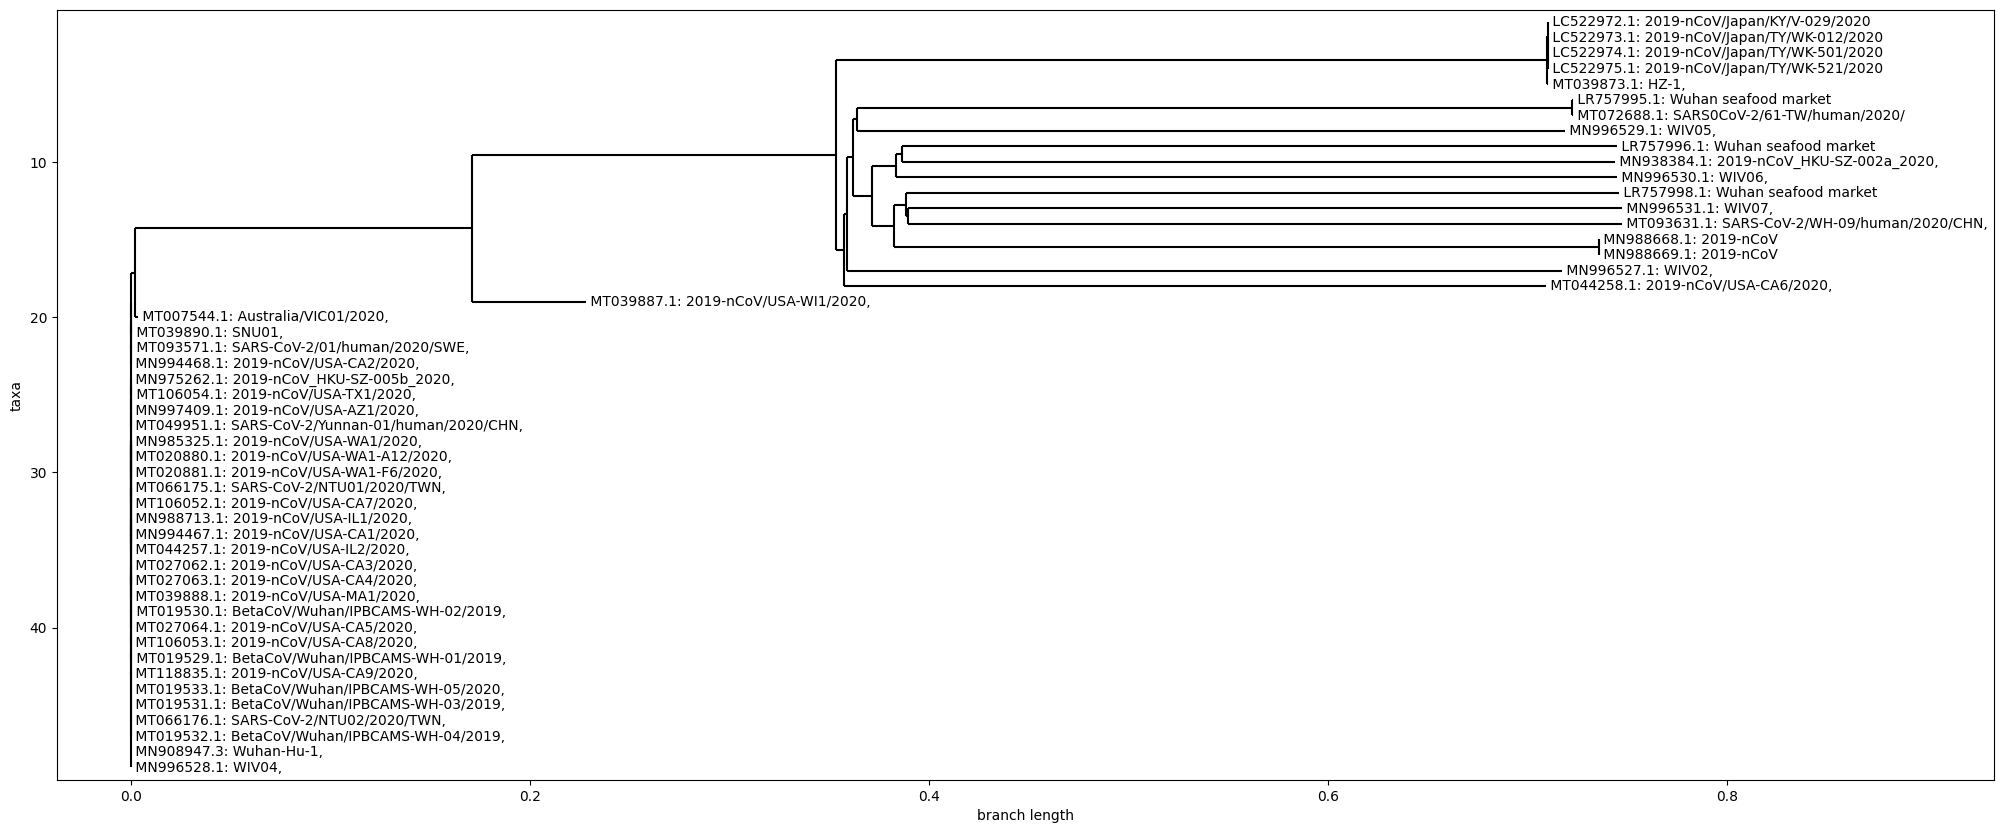

In [ ]:
from Bio import Phylo
from Bio.Phylo.PhyloXML import Phylogeny
import matplotlib
import matplotlib.pyplot as plt

tree = Phylo.read("fasta/covid.all.ph","newick")
tree = Phylogeny.from_tree(tree, )



fig = plt.figure(figsize=(25, 10), dpi=100)
axes = fig.add_subplot(1, 1, 1)

Phylo.draw(tree, label_func=lambda x:f'{x.name}: {seq_dict.get(x.name)}' if x.name else None, axes=axes)

In [ ]:
from Bio.motifs import Motif
from Bio import motifs
from Bio.Seq import Seq

instances = [ Seq("TACAA"), Seq("TACGC"), Seq("TACAC"), Seq("TACCC"), Seq("AACCC"), Seq("AATGC") ]
m = motifs.create(instances)

print(m.counts)
Motif.weblogo(m, 'test.png')


        0      1      2      3      4
A:   2.00   6.00   0.00   2.00   1.00
C:   0.00   0.00   5.00   2.00   5.00
G:   0.00   0.00   0.00   2.00   0.00
T:   4.00   0.00   1.00   0.00   0.00



URLError: ignored